# Big Data Cup - Poisson GLM

I followed this tutorial and applied it to my features: https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958

In [1]:
import pandas as pd
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
#Load the data
pt = pd.read_csv('Top10PlayersTake.csv')
pt

,Player,Position,Player Number,Position Index,Avgx,Avgy,Def. Board,Def. Zone,Neutral,Off. Zone,Off. Board,Actual Takeaways
0,Chad Yetman,Center,29,1,89,43,11,65,16,46,6,144
1,Maxim Golod,Left Winger,77,2,116,45,5,41,22,53,14,135
2,Jack Duff,Defenseman,34,4,42,39,24,62,17,5,0,108
3,Brendan Hoffmann,Right Winger,91,3,91,47,9,39,21,28,6,103
4,Austen Swankler,Center,21,1,126,39,4,22,18,41,17,102
5,Emmett Sproule,Left Winger,93,2,122,41,1,25,24,38,11,99
6,Brendan Sellan,Left Winger,44,2,109,46,3,32,24,34,7,100
7,Daniel D'Amato,Right Winger,17,3,110,34,2,33,13,32,11,91
8,Hayden Fowler,Right Winger,14,3,105,37,4,35,11,29,10,89
9,Kurtis Henry,Defenseman,41,4,47,36,20,39,17,3,0,79


In [19]:
features = ['Position Index', 'Avgx', 'Avgy', 'Def. Board', 'Def. Zone', 'Neutral', 'Off. Zone',
           'Off. Board']
x = pt[features]
y = pt['Actual Takeaways']

In [20]:
poisson_training_results = sm.GLM(y, x, family=sm.families.Poisson()).fit()
poisson_predictions = poisson_training_results.get_prediction(x)
predictions_summary_frame = poisson_predictions.summary_frame()
predicted_counts = predictions_summary_frame['mean']
actual_counts = y
pt['Predicted Takeaways'] = round(predicted_counts)
#Difference between Actual and Predicted
pt['Takeaway Difference'] = pt['Actual Takeaways'] - pt['Predicted Takeaways']
pt

,Player,Position,Player Number,Position Index,Avgx,Avgy,Def. Board,Def. Zone,Neutral,Off. Zone,Off. Board,Actual Takeaways,Predicted Takeaways,Takeaway Difference
0,Chad Yetman,Center,29,1,89,43,11,65,16,46,6,144,140.0,4.0
1,Maxim Golod,Left Winger,77,2,116,45,5,41,22,53,14,135,133.0,2.0
2,Jack Duff,Defenseman,34,4,42,39,24,62,17,5,0,108,113.0,-5.0
3,Brendan Hoffmann,Right Winger,91,3,91,47,9,39,21,28,6,103,116.0,-13.0
4,Austen Swankler,Center,21,1,126,39,4,22,18,41,17,102,104.0,-2.0
5,Emmett Sproule,Left Winger,93,2,122,41,1,25,24,38,11,99,97.0,2.0
6,Brendan Sellan,Left Winger,44,2,109,46,3,32,24,34,7,100,102.0,-2.0
7,Daniel D'Amato,Right Winger,17,3,110,34,2,33,13,32,11,91,84.0,7.0
8,Hayden Fowler,Right Winger,14,3,105,37,4,35,11,29,10,89,95.0,-6.0
9,Kurtis Henry,Defenseman,41,4,47,36,20,39,17,3,0,79,73.0,6.0


In [33]:
#Successful Passing Rate (Complete vs Incomplete)
ne = pd.read_csv('PlayersNE.csv')
features_ne = ['Position Index', 'Avgnx', 'Avgny', 'Incompletions', 'Completions']
xne = ne[features_ne]
yne = ne['CIRatio']
ne

,Player,Position,Player Number,Position Index,Avgnx,Avgny,Incompletions,Completions,CIRatio
0,Chad Yetman,Center,29,1,95,45,24,76,3.2
1,Maxim Golod,Left Winger,77,2,115,45,24,63,2.6
2,Jack Duff,Defenseman,34,4,52,41,27,46,1.7
3,Brendan Hoffmann,Right Winger,91,3,93,48,17,44,2.6
4,Austen Swankler,Center,21,1,127,39,27,44,1.6
5,Emmett Sproule,Left Winger,93,2,124,39,17,44,2.6
6,Brendan Sellan,Left Winger,44,2,110,46,16,34,2.1
7,Daniel D'Amato,Right Winger,17,3,112,39,23,36,1.6
8,Hayden Fowler,Right Winger,14,3,113,39,22,26,1.2
9,Kurtis Henry,Defenseman,41,4,72,35,15,35,2.3


In [34]:
poisson_training_results = sm.GLM(yne, xne, family=sm.families.Poisson()).fit()
poisson_predictions_ne = poisson_training_results.get_prediction(xne)
predictions_summary_frame_ne = poisson_predictions_ne.summary_frame()
predicted_counts_ne = predictions_summary_frame_ne['mean']
actual_counts_ne = yne
ne['Predicted CIRatio'] = round(predicted_counts_ne)
#Difference between Actual and Predicted
ne['CIRatio Difference'] = ne['CIRatio'] - ne['Predicted CIRatio']
ne

,Player,Position,Player Number,Position Index,Avgnx,Avgny,Incompletions,Completions,CIRatio,Predicted CIRatio,CIRatio Difference
0,Chad Yetman,Center,29,1,95,45,24,76,3.2,3.0,0.2
1,Maxim Golod,Left Winger,77,2,115,45,24,63,2.6,3.0,-0.4
2,Jack Duff,Defenseman,34,4,52,41,27,46,1.7,1.0,0.7
3,Brendan Hoffmann,Right Winger,91,3,93,48,17,44,2.6,3.0,-0.4
4,Austen Swankler,Center,21,1,127,39,27,44,1.6,1.0,0.6
5,Emmett Sproule,Left Winger,93,2,124,39,17,44,2.6,3.0,-0.4
6,Brendan Sellan,Left Winger,44,2,110,46,16,34,2.1,2.0,0.1
7,Daniel D'Amato,Right Winger,17,3,112,39,23,36,1.6,2.0,-0.4
8,Hayden Fowler,Right Winger,14,3,113,39,22,26,1.2,1.0,0.2
9,Kurtis Henry,Defenseman,41,4,72,35,15,35,2.3,2.0,0.3


In [27]:
clust = pd.read_csv('Cluster2.csv')
clust

,Player,Position,Player Number,Position Index,Predicted Takeaways,Predicted CIRatio
0,Chad Yetman,Center,29,1,140,3
1,Maxim Golod,Left Winger,77,2,133,3
2,Jack Duff,Defenseman,34,4,113,1
3,Brendan Hoffmann,Right Winger,91,3,116,3
4,Austen Swankler,Center,21,1,104,1
5,Emmett Sproule,Left Winger,93,2,97,3
6,Brendan Sellan,Left Winger,44,2,102,2
7,Daniel D'Amato,Right Winger,17,3,84,2
8,Hayden Fowler,Right Winger,14,3,95,1
9,Kurtis Henry,Defenseman,41,4,73,2


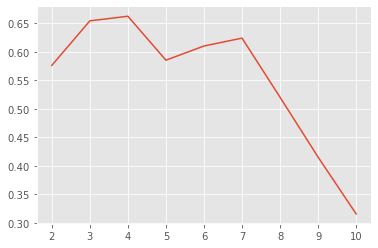

In [28]:
#Determining the right cluster amount - Peak is around 4
silhouette_coefficients = []
features = ['Predicted Takeaways', 'Predicted CIRatio']
xcl = clust[features]

for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(xcl)
    score = silhouette_score(xcl, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2,11),silhouette_coefficients)

In [43]:
plt.style.use('ggplot')
features = ['Predicted Takeaways', 'Predicted CIRatio']
xcl = clust[features]
scale = StandardScaler().fit_transform(xcl)
kmeans = KMeans(n_clusters=4,random_state=0).fit(scale)
y_kmeans = kmeans.predict(scale)

clust['Scaled_Cluster'] = y_kmeans
clust[['Scaled Takeaways', 'Scaled CIRatio']] = scale
clust

,Player,Position,Player Number,Position Index,Predicted Takeaways,Predicted CIRatio,Scaled_Cluster,Scaled Takeaways,Scaled CIRatio
0,Chad Yetman,Center,29,1,140,3,2,1.873307,0.666667
1,Maxim Golod,Left Winger,77,2,133,3,2,1.563360,0.666667
2,Jack Duff,Defenseman,34,4,113,1,1,0.677797,-1.500000
3,Brendan Hoffmann,Right Winger,91,3,116,3,2,0.810631,0.666667
4,Austen Swankler,Center,21,1,104,1,1,0.279293,-1.500000
5,Emmett Sproule,Left Winger,93,2,97,3,3,-0.030654,0.666667
6,Brendan Sellan,Left Winger,44,2,102,2,3,0.190737,-0.416667
7,Daniel D'Amato,Right Winger,17,3,84,2,3,-0.606270,-0.416667
8,Hayden Fowler,Right Winger,14,3,95,1,1,-0.119210,-1.500000
9,Kurtis Henry,Defenseman,41,4,73,2,3,-1.093330,-0.416667


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scaled Takeaways vs Complete to Incomplete Ratio')

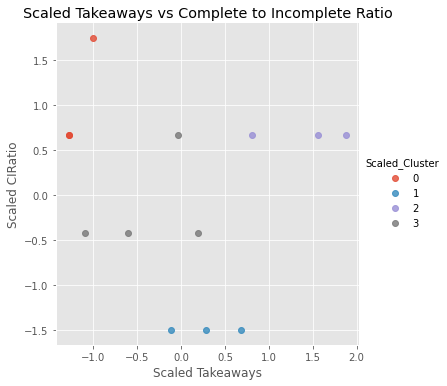

In [44]:
figsize=(24, 16)
sns.lmplot('Scaled Takeaways', 'Scaled CIRatio', data=clust, hue="Scaled_Cluster", fit_reg=False)
plt.title('Scaled Takeaways vs Complete to Incomplete Ratio')